# CIND 820 Traffic Collision Data Analysis and Prediction

ID: 500866890

### Initial Results and Code



---

**Intro**

This project aims to analyze road accident data from 2017-2023 to gain insights into the factors contributing to accidents, identify patterns, and propose data-driven recommendations for improving road safety. The dataset used in this project contains information about various aspects of road accidents, such as location, time, weather conditions, and severity.


**Github Repo**

https://github.com/mkleung/traffic-collision-analysis



**Table of Contents**

1.   Data Import and Description
2.   Data Preprocessing
3.   Exploratory Data Analysis
5.   Data Analysis using Apriori
6.   Collision Prediction using Decision Tree and Random Forest
7.   Comparison and Results



## Dataset Overview
- **Source:** https://open.ottawa.ca/datasets/ottawa::traffic-collision-data/about
- **Size:** 74,613 rows, 29 columns
- **Date Range:** 2017-2023
- **Format:** CSV
- **Copyright:** Open Data Licence Version 2.0 (worldwide, royalty-free, perpetual, non-exclusive licence to copy, modify, publish, translate, adapt and distribute

## Goal of project
- **Use Case:** Predicting Traffic Collision
- **Industry:** Transportation Safety and Traffic management
-  **Users:** City planners, Law enforcement, General public, Cyclists
- **Result:** Develop an application that can predict collision probability from a user input location or a planned route (tentative).

## Questions

These are some of the questions we will be investigating during this project

*  What are the locations where the most frequent accidents occur?
*  Do weather and environmental conditions affect traffic collisions?
*  Do traffic measures decrease traffic collisions?

In [60]:
%reset -f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Packages to install
# mlxtend for apriori
# Y-data-profiling for eda report

%%capture

!pip install pandas mlxtend -q
!pip install ydata-profiling -q
!pip install pandas folium -q
!pip install scikit-learn --upgrade -q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Section 1. Data Import and Description

---



In [66]:
# Import Libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
data=pd.read_csv("Traffic_Collision_Data.csv")
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,Y,ID,Geo_ID,Accident_Year,Accident_Date,Accident_Time,Location,Location_Type,Classification_Of_Accident,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Minimal_Injuries,Num_of_Minor_Injuries,Num_of_Major_Injuries,Num_of_Fatal_Injuries,X_Coordinate,Y_Coordinate,Lat,Long,ObjectId
0,-8.452607e+06,5.661674e+06,2017--1,__5RG32N,NaN,2017/01/01,1:28,WEST RIDGE DR btwn PARLOR PL & BERT G. ARGUE D...,Midblock,03 - P.D. only,07 - SMV other,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349455.5394,5012882.095,45.254481,-75.931061,1
1,-8.422792e+06,5.689206e+06,2017--2,__3Z07B5,NaN,2017/01/01,3:16,VANIER PKWY SB btwn DONALD ST & MCARTHUR AVE (...,Midblock,03 - P.D. only,04 - Sideswipe,03 - Loose snow,03 - Snow,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370277.0644,5032383.845,45.428323,-75.663225,2
2,-8.440990e+06,5.672790e+06,2017--3,639,NaN,2017/01/01,7:17,OLD RICHMOND RD @ ROBERTSON RD (0000639),Intersection,03 - P.D. only,07 - SMV other,01 - Dry,05 - Drifting Snow,03 - Dawn,01 - Traffic signal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357581.5159,5020752.206,45.324735,-75.826700,3
3,-8.429778e+06,5.674892e+06,2017--4,9776,NaN,2017/01/01,8:58,MERIVALE RD @ WOODFIELD DR/ROYDON PL (0009776),Intersection,03 - P.D. only,03 - Rear end,03 - Loose snow,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365462.7011,5022298.499,45.338011,-75.725984,4
4,-8.423751e+06,5.682144e+06,2017--5,7208,NaN,2017/01/01,11:41,BANK ST @ BELANGER AVE/LAMIRA ST (0007208),Intersection,03 - P.D. only,99 - Other,02 - Wet,01 - Clear,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369653.7181,5027427.541,45.383786,-75.671842,5
5,-8.437041e+06,5.678668e+06,2017--6,2748,NaN,2017/01/01,12:08,POULIN AVE @ RICHMOND RD (0002748),Intersection,02 - Non-fatal injury,03 - Rear end,02 - Wet,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,02 - Minor,1.0,NaN,1.0,NaN,NaN,360325.6759,5024900.519,45.361850,-75.791232,6
6,-8.415138e+06,5.692987e+06,2017--7,__3Z0CDR,NaN,2017/01/01,Unknown,EASTVALE DR btwn OGILVIE RD & LOYOLA AVE (__3Z...,Midblock,03 - P.D. only,06 - SMV unattended vehicle,04 - Slush,03 - Snow,00 - Unknown,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375627.2581,5035090.654,45.452156,-75.594470,7
7,-8.436077e+06,5.672019e+06,2017--8,__3Z07PT,NaN,2017/01/01,20:26,WEST HUNT CLUB RD EB btwn CEDARVIEW RD & GREEN...,Midblock,03 - P.D. only,04 - Sideswipe,02 - Wet,01 - Clear,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361045.7338,5020240.736,45.319864,-75.782571,8
8,-8.422145e+06,5.688649e+06,2017--9,8259,NaN,2017/01/01,20:43,QUEEN MARY ST @ QUILL ST (0008259),Intersection,03 - P.D. only,07 - SMV other,03 - Loose snow,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370735.7151,5031998.578,45.424814,-75.657416,9
9,-8.432027e+06,5.678159e+06,2017--10,3209,NaN,2017/01/01,21:40,ERINDALE DR @ BASELINE RD (0003209),Intersection,03 - P.D. only,07 - SMV other,02 - Wet,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363857.6929,5024575.518,45.358637,-75.746190,10


In [67]:
# Print a summary of the data attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74612 entries, 0 to 74611
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           74612 non-null  float64
 1   Y                           74612 non-null  float64
 2   ID                          74612 non-null  object 
 3   Geo_ID                      74612 non-null  object 
 4   Accident_Year               0 non-null      float64
 5   Accident_Date               74612 non-null  object 
 6   Accident_Time               74612 non-null  object 
 7   Location                    74612 non-null  object 
 8   Location_Type               74612 non-null  object 
 9   Classification_Of_Accident  74612 non-null  object 
 10  Initial_Impact_Type         74607 non-null  object 
 11  Road_Surface_Condition      74611 non-null  object 
 12  Environment_Condition       74610 non-null  object 
 13  Light                       746

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Show the descriptive statistics
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,Y,Accident_Year,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Minimal_Injuries,Num_of_Minor_Injuries,Num_of_Major_Injuries,Num_of_Fatal_Injuries,X_Coordinate,Y_Coordinate,Lat,Long,ObjectId
count,7.461200e+04,7.461200e+04,0.0,74612.000000,74612.000000,1347.000000,637.000000,13417.000000,5733.000000,7804.000000,671.000000,141.000000,74612.000000,7.461200e+04,74612.000000,74612.000000,74612.000000
mean,-8.428035e+06,5.670130e+06,NaN,1.841219,0.022289,1.010393,1.015699,1.298353,1.212977,1.226422,1.108793,1.070922,366572.012158,5.017227e+06,45.291930,-75.710325,37306.500000
std,1.870145e+04,2.316663e+05,NaN,0.586512,0.153846,0.115173,0.136459,0.734951,0.562083,0.585715,0.612139,0.283987,15213.451923,2.042363e+05,1.843572,0.167998,21538.773479
min,-8.820655e+06,0.000000e+00,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,-79.237290,1.000000
25%,-8.433028e+06,5.674170e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363147.689000,5.021766e+06,45.333451,-75.755176,18653.750000
50%,-8.426515e+06,5.681383e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367676.548050,5.026853e+06,45.378984,-75.696671,37306.500000
75%,-8.420483e+06,5.687619e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,371925.281000,5.031266e+06,45.418314,-75.642484,55959.250000
max,-8.378081e+06,5.704542e+06,NaN,25.000000,3.000000,3.000000,3.000000,38.000000,11.000000,10.000000,14.000000,3.000000,401821.931000,5.043439e+06,45.524921,-75.261583,74612.000000


In [69]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
X                                 0
Y                                 0
ID                                0
Geo_ID                            0
Accident_Year                 74612
Accident_Date                     0
Accident_Time                     0
Location                          0
Location_Type                     0
Classification_Of_Accident        0
Initial_Impact_Type               5
Road_Surface_Condition            1
Environment_Condition             2
Light                             0
Traffic_Control                   1
Num_of_Vehicle                    0
Num_Of_Pedestrians                0
Num_of_Bicycles               73265
Num_of_Motorcycles            73975
Max_Injury                    61143
Num_of_Injuries               61195
Num_of_Minimal_Injuries       68879
Num_of_Minor_Injuries         66808
Num_of_Major_Injuries         73941
Num_of_Fatal_Injuries         74471
X_Coordinate                      0
Y_Coordinate                      0
Lat         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Summary of Data Description**

*  Accident_Year has 100% missing values                 
*  These attributes all have >80% missing values:
   * Num_of_Bicycles, Num_of_Motorcycles, Max_Injury, Num_of_Injuries, Num_of_Minimal_Injuries, Num_of_Minor_Injuries, Num_of_Major_Injuries, Num_of_Fatal_Injuries
* These have < 5 missing values
  * Traffic_Control, Initial_Impact_Type, Road_Surface_Condition, environmental condition
*  The column Accident_Time contains some "Unknown" or Null values
*  X, Y, GeoID, X_Cordinate, Y_Coordinate are duplicates and not needed
*  ID, GEOID are metadata
*  Classification_Of_Accident, etc contains numbers corresponding categorical data



# Section 2. Data Cleaning and Preprocessing

---


In [70]:
df = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# Drop Redundant Columns

# Accident_Year contains only null values
# ObjectID, Geo_ID, ID are database primary keys
# X_Coordinate, Y_Coordinate, X , Y are duplicates of long, lat
# Location column is irrelevant as lat and long are going to be used in this project
# Num_of_Minimal_Injuries, Num_of_Minor_Injuries, Num_of_Major_Injuries are not required
# as we will use num_of_injuries and fatal injuries
# Location_Type, Classification_Of_Accident both contain only 2 unique values
# which are not descriptive enought for our analysis

columns_to_drop = [
     "Accident_Year",
     "Geo_ID", "ObjectId", "ID",
     "X", "Y", "X_Coordinate", "Y_Coordinate",
     "Location",
     "Num_of_Minimal_Injuries", "Num_of_Minor_Injuries", "Num_of_Major_Injuries",
     "Location_Type", "Classification_Of_Accident"
]
df = df.drop(columns=columns_to_drop)
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: "['Accident_Year', 'Geo_ID', 'ObjectId', 'ID', 'X', 'Y', 'X_Coordinate', 'Y_Coordinate', 'Location', 'Num_of_Minimal_Injuries', 'Num_of_Minor_Injuries', 'Num_of_Major_Injuries', 'Location_Type', 'Classification_Of_Accident'] not found in axis"

In [73]:
# Remove Unknown values from te Accident_Time and replace with median
# For example, row number 6 has an unknown time

df['Accident_Time1'] = pd.to_datetime(df['Accident_Time'], errors='coerce', format='%H:%M')
median_time = df['Accident_Time1'].dropna().median()
if pd.notnull(median_time):
    median_time_str = median_time.strftime('%H:%M')

df['Accident_Time'] = df['Accident_Time'].replace("Unknown", median_time_str)
df = df.drop(columns=['Accident_Time1'])
df.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accident_Date,Accident_Time,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long
0,2017/01/01,1:28,07 - SMV other,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061
1,2017/01/01,3:16,04 - Sideswipe,03 - Loose snow,03 - Snow,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,45.428323,-75.663225
2,2017/01/01,7:17,07 - SMV other,01 - Dry,05 - Drifting Snow,03 - Dawn,01 - Traffic signal,1,0,NaN,NaN,NaN,NaN,NaN,45.324735,-75.826700
3,2017/01/01,8:58,03 - Rear end,03 - Loose snow,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.338011,-75.725984
4,2017/01/01,11:41,99 - Other,02 - Wet,01 - Clear,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.383786,-75.671842
5,2017/01/01,12:08,03 - Rear end,02 - Wet,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,02 - Minor,1.0,NaN,45.361850,-75.791232
6,2017/01/01,14:39,06 - SMV unattended vehicle,04 - Slush,03 - Snow,00 - Unknown,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.452156,-75.594470
7,2017/01/01,20:26,04 - Sideswipe,02 - Wet,01 - Clear,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,45.319864,-75.782571
8,2017/01/01,20:43,07 - SMV other,03 - Loose snow,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,45.424814,-75.657416
9,2017/01/01,21:40,07 - SMV other,02 - Wet,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,45.358637,-75.746190


In [74]:
# Combine the date and time into one column
def combine_date_time(row):
    try:
        return pd.to_datetime(f"{row['Accident_Date']} {row['Accident_Time']}")
    except Exception:
        return pd.NaT
df['Accident_Timestamp'] = df.apply(combine_date_time, axis=1)
df = df.drop(columns=['Accident_Date','Accident_Time'])
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,07 - SMV other,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061,2017-01-01 01:28:00


In [75]:
# Clean data inside category columns

df['Initial_Impact_Type'] = df['Initial_Impact_Type'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Road_Surface_Condition'] = df['Road_Surface_Condition'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Environment_Condition'] = df['Environment_Condition'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Light'] = df['Light'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Traffic_Control'] = df['Traffic_Control'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Max_Injury'] = df['Max_Injury'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,SMV other,Loose snow,Rain,Dark,No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061,2017-01-01 01:28:00


In [76]:
# Remove Null Values

# Replace null values with zero in these columns that have 80% null values
# Context: these null values should be zero because there are no injuries.
columns_to_fill = [
    'Num_of_Bicycles',
    'Num_of_Motorcycles',
    'Num_of_Injuries',
    'Num_of_Fatal_Injuries'
]
for column in columns_to_fill:
    df[column] = df[column].fillna(0)

# Remove the rows that have less than 5 null values
df.dropna(subset=['Initial_Impact_Type'], inplace=True)
df.dropna(subset=['Road_Surface_Condition'], inplace=True)
df.dropna(subset=['Environment_Condition'], inplace=True)
df.dropna(subset=['Traffic_Control'], inplace=True)

# Max_Injury (Categorical) - null values means no injury sustained will be filled with None
df['Max_Injury'] = df['Max_Injury'].fillna("None")

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,SMV other,Loose snow,Rain,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00
1,Sideswipe,Loose snow,Snow,Dark,No control,2,0,0.0,0.0,None,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00
2,SMV other,Dry,Drifting Snow,Dawn,Traffic signal,1,0,0.0,0.0,None,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00
3,Rear end,Loose snow,Snow,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00
4,Other,Wet,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00


In [77]:
# Check if there are any missing values remaining
print(df.isnull().sum())

Initial_Impact_Type       0
Road_Surface_Condition    0
Environment_Condition     0
Light                     0
Traffic_Control           0
Num_of_Vehicle            0
Num_Of_Pedestrians        0
Num_of_Bicycles           0
Num_of_Motorcycles        0
Max_Injury                0
Num_of_Injuries           0
Num_of_Fatal_Injuries     0
Lat                       0
Long                      0
Accident_Timestamp        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# Drop duplicates
Num_of_duplicates = sum(df.duplicated())
df = df.drop_duplicates()
print("Duplicates rows dropped:\n", Num_of_duplicates)

Duplicates rows dropped:
 8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Standardize column names
# Some column names have missing 's' and wrong capital letters
# Max_Injury is a confusing column title and is renamed to Injury_Type

df.rename(columns={'Num_of_Vehicle': 'Num_of_Vehicles'}, inplace=True)
df.rename(columns={'Num_Of_Pedestrians': 'Num_of_Pedestrians'}, inplace=True)
df.rename(columns={'Max_Injury': 'Injury_Type'}, inplace=True)
df.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,SMV other,Loose snow,Rain,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00


In [80]:
# Detect and Remove Outliers

# Lat contains some outliers because the min is 0
# Num_of_Injuries could have one outlier

# NOTE Z-Score or Interquartile range methods are not required for Lat and Long
# because their outliers are assumed to be user input errors or null values

df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
count,74595.000000,74595.000000,74595.000000,74595.000000,74595.000000,74595.000000,74595.000000,74595.000000,74595
mean,1.841249,0.022294,0.018232,0.008674,0.233514,0.002024,45.292518,-75.710287,2019-09-10 23:32:03.227830528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-79.237290,2017-01-01 00:15:00
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.333451,-75.755182,2018-04-13 15:12:30
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.378984,-75.696671,2019-07-06 16:30:00
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.418309,-75.642484,2021-01-26 12:26:00
max,25.000000,3.000000,3.000000,3.000000,38.000000,3.000000,45.524921,-75.261583,2022-12-30 14:20:00
std,0.586535,0.153863,0.135383,0.094304,0.588057,0.048116,1.836308,0.167512,NaN


In [82]:
# Investigate outliers in Num_of_Injuries
# This one value is the one off famous bus crash in 2019

column_name = 'Num_of_Injuries'
temp_injuries = df[df[column_name] > 10]
temp_injuries


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
29688,SMV other,Unknown,Clear,Daylight,No control,1,0,0.0,0.0,Fatal,38.0,3.0,45.396613,-75.752107,2019-01-11 15:51:00


In [83]:
# Delete the outlier
row_index = 29688
df = df.drop(index=row_index)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Investigate latitude
# There are 130 rows with questionable latitudes which point to somewhere in the UK
column_name = 'Lat'
temp_lat = df[df[column_name] < 40]
temp_lat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
564,Turning movement,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-01-22 15:06:00
1695,Sideswipe,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-02-02 14:36:00
2211,Turning movement,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-03-19 17:20:00
2530,Sideswipe,Dry,Clear,Daylight,Traffic signal,2,0,0.0,1.0,None,0.0,0.0,3.318485,-75.940952,2017-03-21 16:39:00
3035,Sideswipe,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-03-30 12:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71977,Sideswipe,Dry,Clear,Daylight,Stop sign,2,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-09-28 15:09:00
71988,SMV other,Dry,Clear,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-30 19:10:00
72397,SMV other,Dry,Clear,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-09 06:33:00
72852,SMV other,Dry,Clear,Dawn,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-28 17:23:00


In [85]:
# Remove the questionable latitudes
df = df[df['Lat'] >= 40]
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'Num_of_Vehicles'}>,
        <Axes: title={'center': 'Num_of_Pedestrians'}>,
        <Axes: title={'center': 'Num_of_Bicycles'}>],
       [<Axes: title={'center': 'Num_of_Motorcycles'}>,
        <Axes: title={'center': 'Num_of_Injuries'}>,
        <Axes: title={'center': 'Num_of_Fatal_Injuries'}>],
       [<Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Long'}>,
        <Axes: title={'center': 'Accident_Timestamp'}>]], dtype=object)

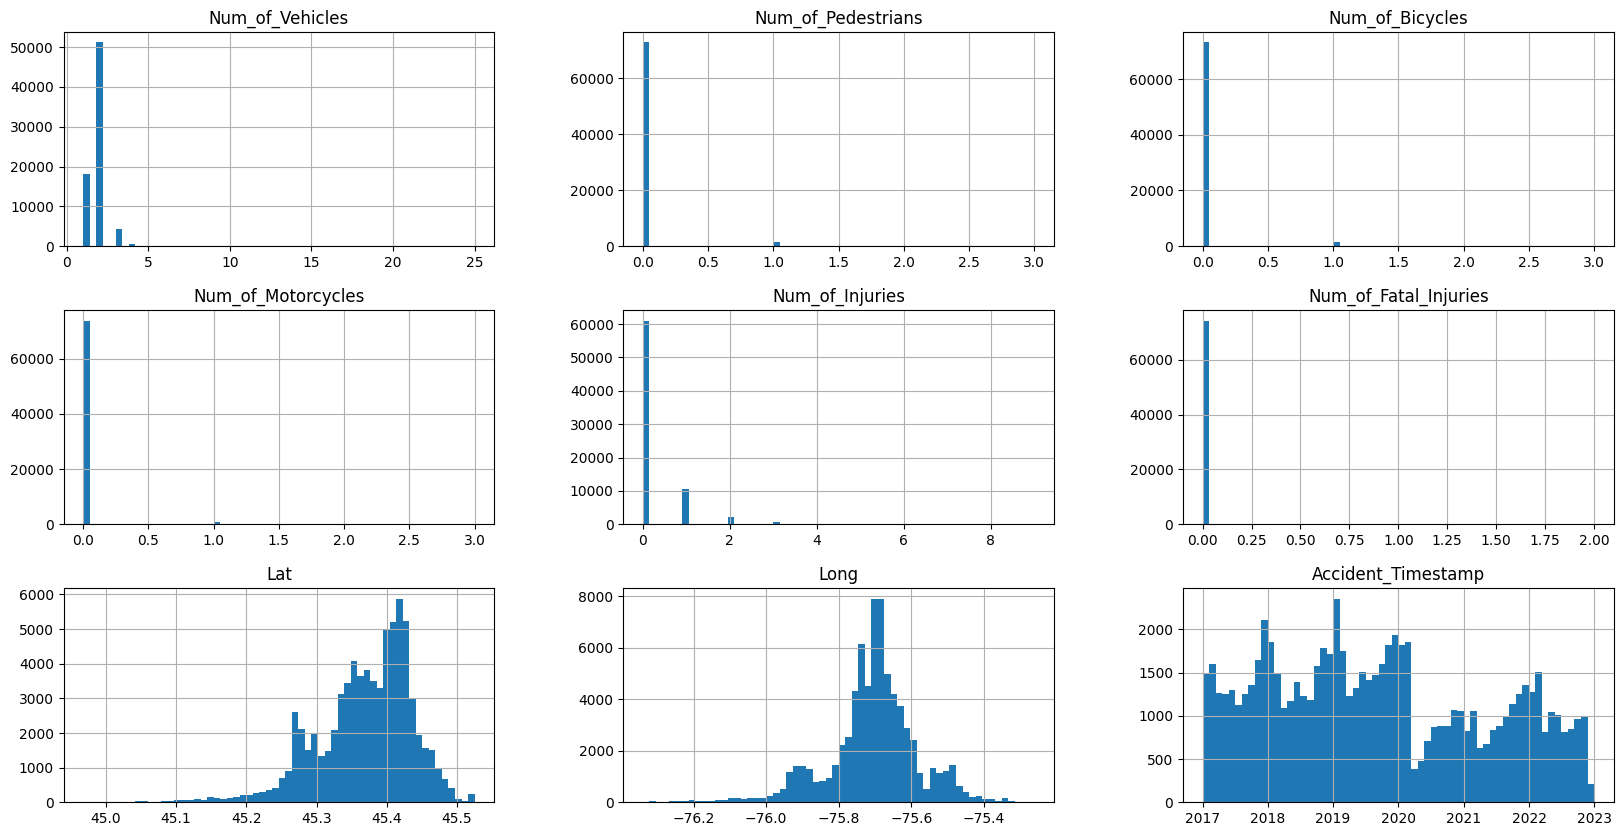

In [86]:
# Create histograms to look for any other outliers
df.hist(bins=60, figsize=(20,10))

In [87]:
# Step 5: One Hot Encode the categorical variables
columns_to_encode = ['Initial_Impact_Type', 'Road_Surface_Condition', 'Environment_Condition', 'Light','Traffic_Control', 'Injury_Type']

# Ensure the columns to be encoded are treated as strings
for col in columns_to_encode:
    df[col] = df[col].astype(str)

# Perform one-hot encoding
encoded_data = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the resulting dataset's shape to confirm encoding
print("Original dataset shape:", df.shape)
print("Encoded dataset shape:", encoded_data.shape)
df = encoded_data.copy()
df.head(1)

Original dataset shape: (74464, 15)
Encoded dataset shape: (74464, 54)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp,Initial_Impact_Type_Approaching,Initial_Impact_Type_Other,Initial_Impact_Type_Rear end,Initial_Impact_Type_SMV other,Initial_Impact_Type_SMV unattended vehicle,Initial_Impact_Type_Sideswipe,Initial_Impact_Type_Turning movement,Road_Surface_Condition_Ice,Road_Surface_Condition_Loose sand or gravel,Road_Surface_Condition_Loose snow,Road_Surface_Condition_Mud,Road_Surface_Condition_Other,Road_Surface_Condition_Packed snow,Road_Surface_Condition_Slush,Road_Surface_Condition_Spilled liquid,Road_Surface_Condition_Unknown,Road_Surface_Condition_Wet,Environment_Condition_Drifting Snow,"Environment_Condition_Fog, mist, smoke, dust",Environment_Condition_Freezing Rain,Environment_Condition_Other,Environment_Condition_Rain,Environment_Condition_Snow,Environment_Condition_Strong wind,Environment_Condition_Unknown,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Light_Unknown,Traffic_Control_MPS,Traffic_Control_No control,Traffic_Control_Other,Traffic_Control_Ped. crossover,Traffic_Control_Roundabout,Traffic_Control_School bus,Traffic_Control_Stop sign,Traffic_Control_Traffic controller,Traffic_Control_Traffic gate,Traffic_Control_Traffic signal,Traffic_Control_Yield sign,Injury_Type_Major,Injury_Type_Minimal,Injury_Type_Minor,Injury_Type_None
0,1,0,0.0,0.0,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.to_csv('clean_df.csv', index=False)

**Summary of Data preprocessing**

* Numeric Columns that have greater greater than 80% null values have been replaced by zero because they have been likely been omitted during the data entry phase.
* Category Columns that have less than 5 null were removed
* Column titles have been renamed
* Several irrelevant Columns have been dropped
* Duplicates have been removed
* Outliers were found and latitude and removed.
* Categorical columns have been one hot encoded

# Section 3.   Exploratory Data Analysis and Visualization
---





In [88]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp,Initial_Impact_Type_Approaching,Initial_Impact_Type_Other,Initial_Impact_Type_Rear end,Initial_Impact_Type_SMV other,Initial_Impact_Type_SMV unattended vehicle,Initial_Impact_Type_Sideswipe,Initial_Impact_Type_Turning movement,Road_Surface_Condition_Ice,Road_Surface_Condition_Loose sand or gravel,Road_Surface_Condition_Loose snow,Road_Surface_Condition_Mud,Road_Surface_Condition_Other,Road_Surface_Condition_Packed snow,Road_Surface_Condition_Slush,Road_Surface_Condition_Spilled liquid,Road_Surface_Condition_Unknown,Road_Surface_Condition_Wet,Environment_Condition_Drifting Snow,"Environment_Condition_Fog, mist, smoke, dust",Environment_Condition_Freezing Rain,Environment_Condition_Other,Environment_Condition_Rain,Environment_Condition_Snow,Environment_Condition_Strong wind,Environment_Condition_Unknown,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Light_Unknown,Traffic_Control_MPS,Traffic_Control_No control,Traffic_Control_Other,Traffic_Control_Ped. crossover,Traffic_Control_Roundabout,Traffic_Control_School bus,Traffic_Control_Stop sign,Traffic_Control_Traffic controller,Traffic_Control_Traffic gate,Traffic_Control_Traffic signal,Traffic_Control_Yield sign,Injury_Type_Major,Injury_Type_Minimal,Injury_Type_Minor,Injury_Type_None
0,1,0,0.0,0.0,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,0,0.0,0.0,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,1,0,0.0,0.0,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,2,0,0.0,0.0,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,2,0,0.0,0.0,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


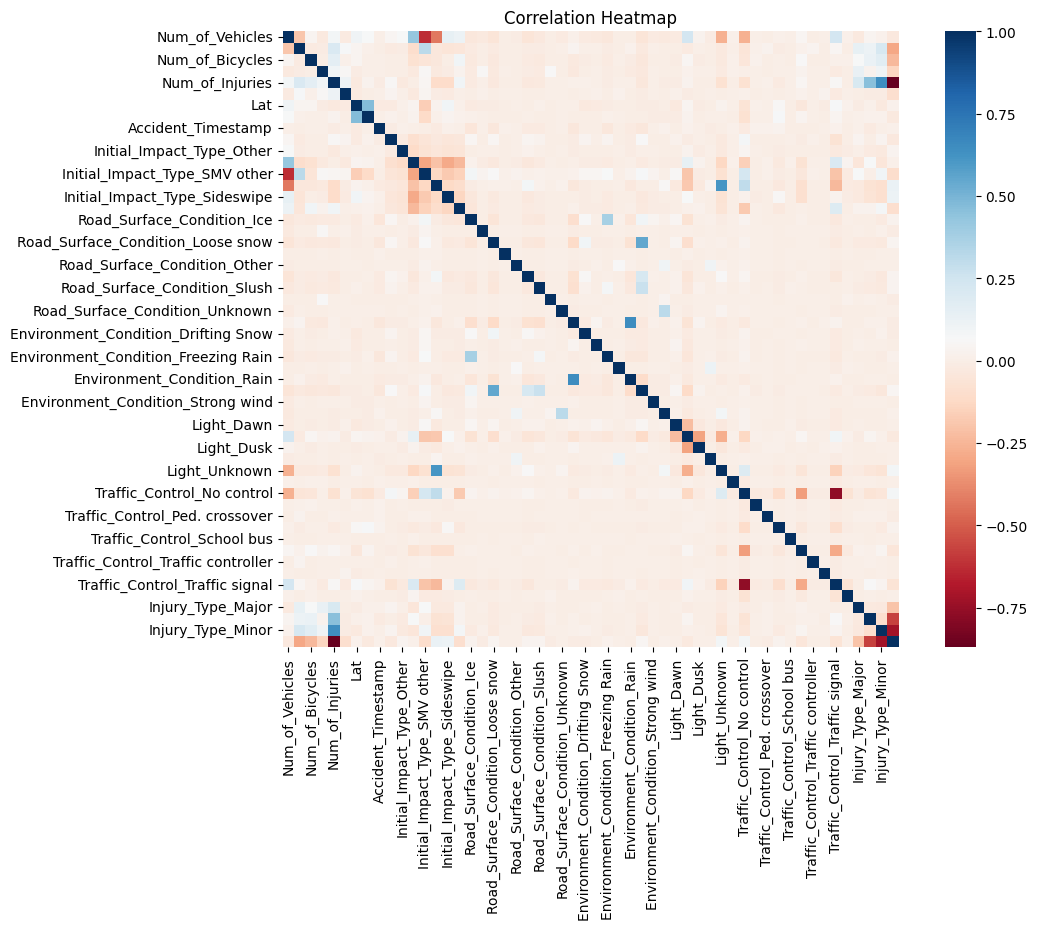

In [89]:
# Correlation Heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='RdBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [90]:
# Show highest correlations
correlation_pairs = correlation_matrix.unstack()
sorted_correlations = correlation_pairs.sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations < 1]
top_correlations = sorted_correlations.head(10)
print("Top 10 Correlations:")
print(top_correlations)

Top 10 Correlations:
Road_Surface_Condition_Wet                  Environment_Condition_Rain                    0.655350
Environment_Condition_Rain                  Road_Surface_Condition_Wet                    0.655350
Injury_Type_Minor                           Num_of_Injuries                               0.644279
Num_of_Injuries                             Injury_Type_Minor                             0.644279
Initial_Impact_Type_SMV unattended vehicle  Light_Unknown                                 0.613587
Light_Unknown                               Initial_Impact_Type_SMV unattended vehicle    0.613587
Environment_Condition_Snow                  Road_Surface_Condition_Loose snow             0.554039
Road_Surface_Condition_Loose snow           Environment_Condition_Snow                    0.554039
Long                                        Lat                                           0.469353
Lat                                         Long                                        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
# Show lowest correlations
sorted_correlations = correlation_pairs.sort_values(ascending=True)
sorted_correlations = sorted_correlations[sorted_correlations < 1]
bottom_correlations = sorted_correlations.head(10)
print("Top 10 Lowest Correlations:")
print(bottom_correlations)

Top 10 Lowest Correlations:
Num_of_Injuries                 Injury_Type_None                 -0.870617
Injury_Type_None                Num_of_Injuries                  -0.870617
Traffic_Control_Traffic signal  Traffic_Control_No control       -0.766861
Traffic_Control_No control      Traffic_Control_Traffic signal   -0.766861
Injury_Type_Minor               Injury_Type_None                 -0.720206
Injury_Type_None                Injury_Type_Minor                -0.720206
Initial_Impact_Type_SMV other   Num_of_Vehicles                  -0.624984
Num_of_Vehicles                 Initial_Impact_Type_SMV other    -0.624984
Injury_Type_None                Injury_Type_Minimal              -0.572750
Injury_Type_Minimal             Injury_Type_None                 -0.572750
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


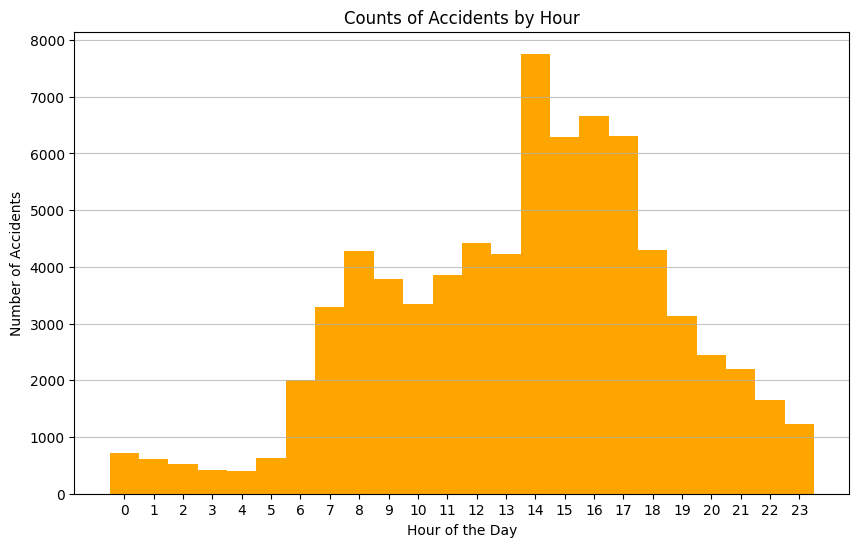

In [92]:
# Create accident count by the hour

df['Hour'] = df['Accident_Timestamp'].dt.hour
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=range(0, 25), align='left', color='orange')
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Counts of Accidents by Hour')
plt.grid(axis='y', alpha=0.75)
plt.show()


* The highest accidents occur in the afternoon at around 2pm - 6pm
* Lowest happen at night from 11pm to 6am

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


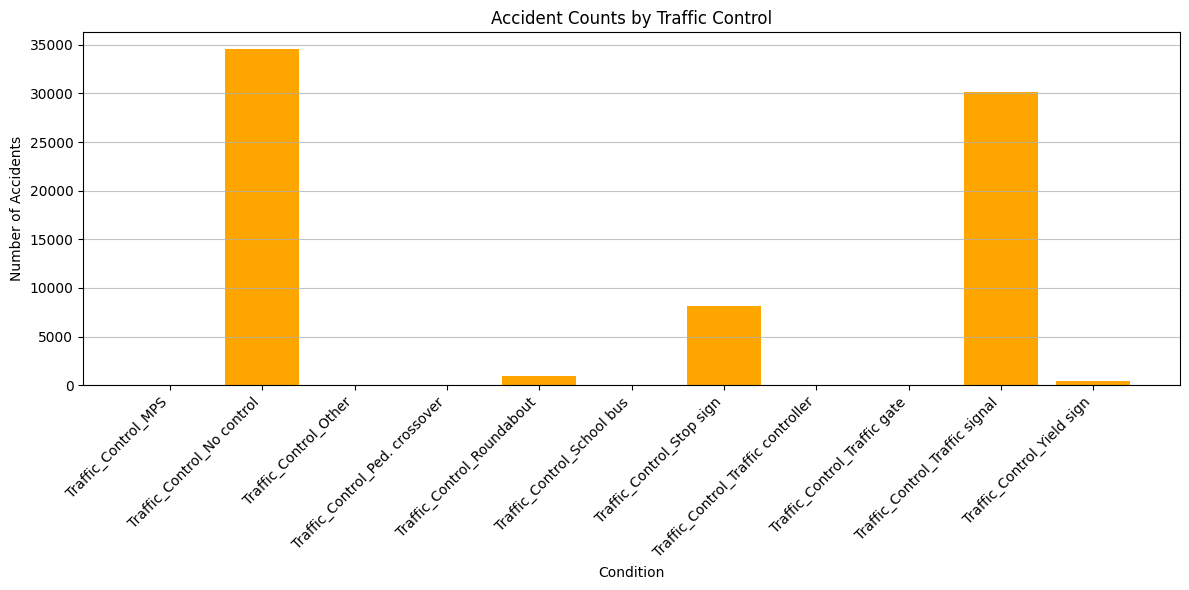

In [94]:
# Function to create histograms
def plot_accident_counts_by_condition(df, column_prefix, title):
    condition_columns = [col for col in df.columns if col.startswith(column_prefix)]
    condition_counts = df[condition_columns].sum().reset_index()
    condition_counts.columns = ['Condition', 'Accident Count']
    condition_counts = condition_counts[condition_counts['Accident Count'] > 0]
    plt.figure(figsize=(12, 6))
    plt.bar(condition_counts['Condition'], condition_counts['Accident Count'], color='orange')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Condition')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

# Show histogram of accident counts per traffic control type
plot_accident_counts_by_condition(df, 'Traffic_Control_', 'Accident Counts by Traffic Control')


Highest accident counts happen when there is
*   No traffic Control
*   Traffic Signal



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


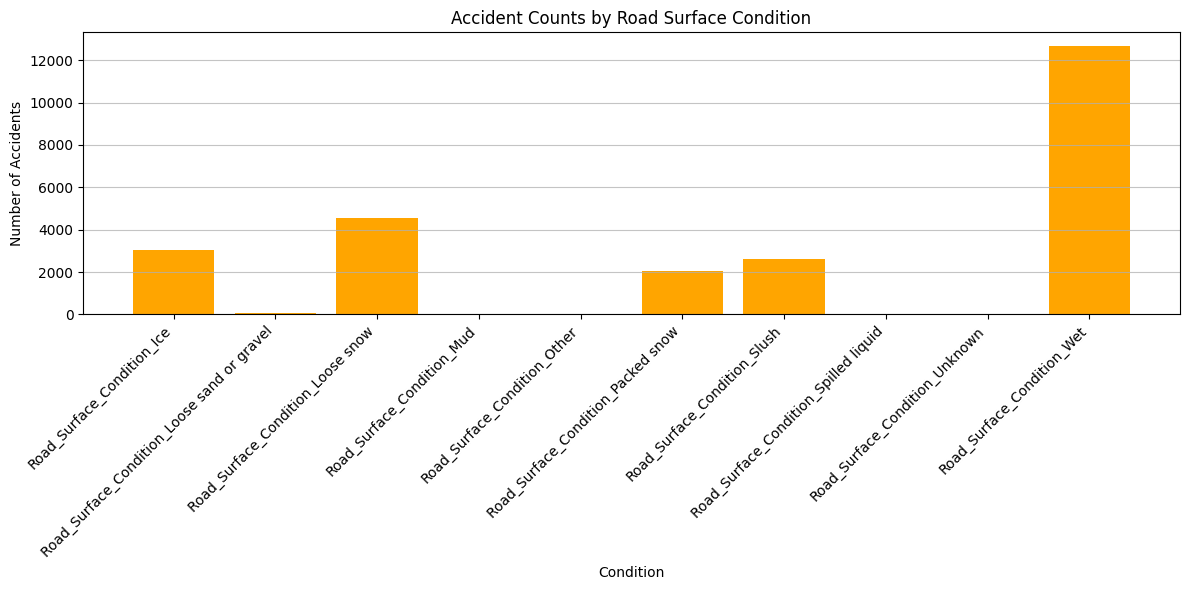

In [95]:
# Call the function for road surface conditions
plot_accident_counts_by_condition(df, 'Road_Surface_Condition_', 'Accident Counts by Road Surface Condition')


*   Most accidents occur during wet weather



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


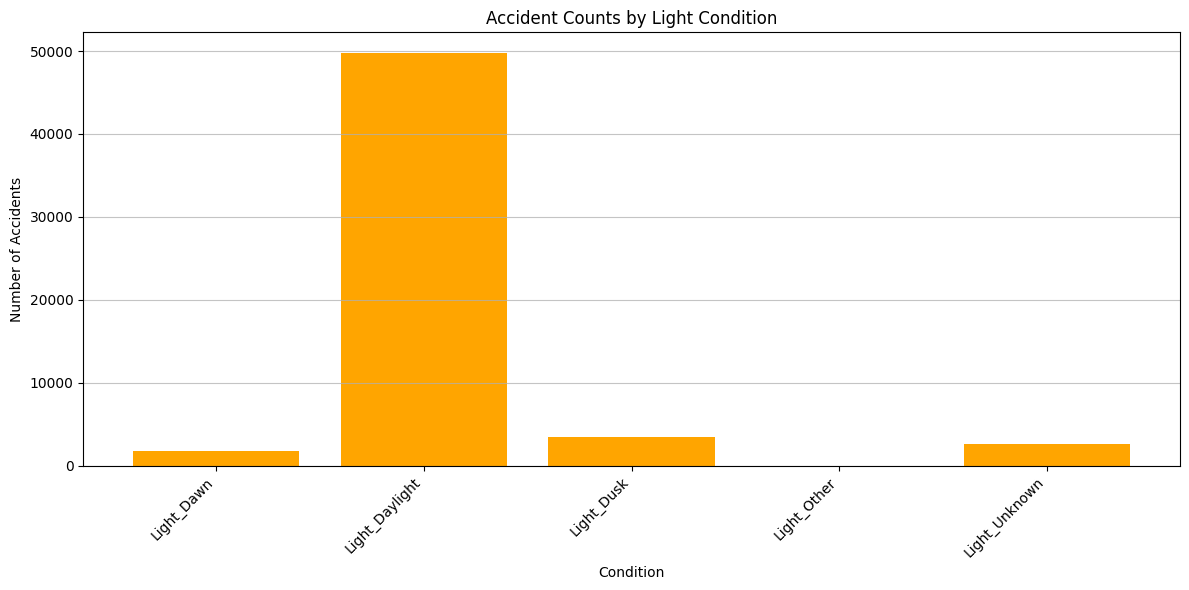

In [96]:
plot_accident_counts_by_condition(df, 'Light_', 'Accident Counts by Light Condition')

In [97]:
# Visualize the locations of fatal injuries

import folium
def create_map(df, lat_column, lon_column, value_column=None):

    m = folium.Map(location=[df[lat_column].mean(), df[lon_column].mean()], zoom_start=12, zoomControl=False)
    for _, row in df.iterrows():
        if row[value_column] > 0:
            Num_of_Fatal_Injuries = int(row.get("Num_of_Fatal_Injuries", 0)) if pd.notna(row.get("Num_of_Fatal_Injuries")) else 0
            Num_of_Injuries = int(row.get("Num_of_Injuries", 0)) if pd.notna(row.get("Num_of_Injuries")) else 0
            Num_of_Bicycles = int(row.get("Num_of_Bicycles", 0)) if pd.notna(row.get("Num_of_Bicycles")) else 0
            Num_of_Motorcycles = int(row.get("Num_of_Motorcycles", 0)) if pd.notna(row.get("Num_of_Motorcycles")) else 0
            popup_text = (
                f'<div style="width: 200px;">'
                f'<strong>Deaths:</strong> {Num_of_Fatal_Injuries}<br>'
                f'<strong>Injuries:</strong> {Num_of_Injuries}<br>'
                f'<strong>Vehicles:</strong> {row.get("Num_of_Vehicles", "N/A")}<br>'
                f'<strong>Pedestrians:</strong> {row.get("Num_of_Pedestrians", "N/A")}<br>'
                f'<strong>Bicycles:</strong> {Num_of_Bicycles}<br>'
                f'<strong>Motorcyles:</strong> {Num_of_Motorcycles}<br>'
                f'<strong>Time:</strong> {row.get("Accident_Timestamp", "N/A")}'
                f'</div>'
            )

            folium.CircleMarker(
                location=(row[lat_column], row[lon_column]),
                radius=3,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=1,
                popup=popup_text
            ).add_to(m)

    return m

lat_column = 'Lat'
lon_column = 'Long'
value_column = 'Num_of_Fatal_Injuries'

map_with_dots = create_map(df, lat_column, lon_column, value_column)
map_with_dots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# Using Y Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Traffic Collision Report")
profile.to_file("collision_report.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 3 ... 6 6 7]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Section 4. Data Analysis using Apriori (incomplete)
---

Find the association rule between the following that contribute the the frequency of collisions

*   Light
*   Environmental_Condition
*   Traffic_Control
*   Road Surface Condition


This Section will be completed for the final project as I realized I need to redo some additional data cleaning and ran out of time.


In [ ]:
# Incomplete Code (code returning error - will fix for final project)
# I will get it to work for my final project
# Source
# https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
# https://intellipaat.com/blog/data-science-apriori-algorithm/

from mlxtend.frequent_patterns import apriori, association_rules

# Convert the dataframe into true/false (incomplete)


# Apply the apropri algorithm
association_rules = apriori(df, min_support=0.0045, use_colnames=True)
association_results = list(association_rules)
print(len(association_results))
print(association_results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 45.25448109

# Section 5. Collision Prediction using decision tree
---

Target Variables
* Num_of_Injuries
* Num_of_Fatal_Injuries



In [99]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp,Initial_Impact_Type_Approaching,Initial_Impact_Type_Other,Initial_Impact_Type_Rear end,Initial_Impact_Type_SMV other,Initial_Impact_Type_SMV unattended vehicle,Initial_Impact_Type_Sideswipe,Initial_Impact_Type_Turning movement,Road_Surface_Condition_Ice,Road_Surface_Condition_Loose sand or gravel,Road_Surface_Condition_Loose snow,Road_Surface_Condition_Mud,Road_Surface_Condition_Other,Road_Surface_Condition_Packed snow,Road_Surface_Condition_Slush,Road_Surface_Condition_Spilled liquid,Road_Surface_Condition_Unknown,Road_Surface_Condition_Wet,Environment_Condition_Drifting Snow,"Environment_Condition_Fog, mist, smoke, dust",Environment_Condition_Freezing Rain,Environment_Condition_Other,Environment_Condition_Rain,Environment_Condition_Snow,Environment_Condition_Strong wind,Environment_Condition_Unknown,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Light_Unknown,Traffic_Control_MPS,Traffic_Control_No control,Traffic_Control_Other,Traffic_Control_Ped. crossover,Traffic_Control_Roundabout,Traffic_Control_School bus,Traffic_Control_Stop sign,Traffic_Control_Traffic controller,Traffic_Control_Traffic gate,Traffic_Control_Traffic signal,Traffic_Control_Yield sign,Injury_Type_Major,Injury_Type_Minimal,Injury_Type_Minor,Injury_Type_None,Hour
0,1,0,0.0,0.0,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1
1,2,0,0.0,0.0,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,3
2,1,0,0.0,0.0,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,7
3,2,0,0.0,0.0,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,8
4,2,0,0.0,0.0,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,11


In [101]:
# Source Code from CIND 123

# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
class_col_name='Num_of_Injuries'

feature_names=df.columns[df.columns != class_col_name ]
feature_names = feature_names.drop(['Accident_Timestamp'])


# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


class Names ['0.0', '1.0', '2.0', '5.0', '6.0', '3.0', '4.0', '8.0', '7.0', '9.0']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


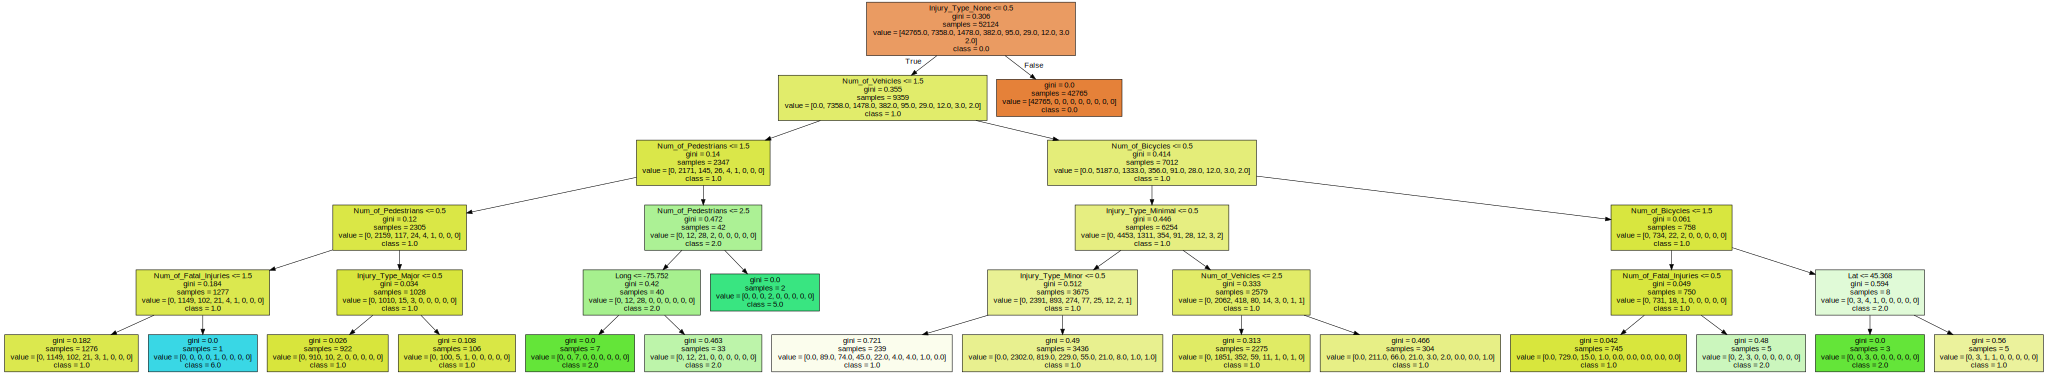

In [103]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
# Convert class_values to strings
class_values = [str(value) for value in class_values]
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph


In [108]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cf)

# Print classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Instead of unpacking to tn, fp, fn, tp which works for binary classification,
# For multi-class, consider overall metrics like accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix
[[18300     0     0     0     0     0     0     0     0     0]
 [    0  3118     5     0     0     0     0     0     0     0]
 [    0   700    13     0     2     0     0     0     0     0]
 [    0   140     0     1     0     0     0     0     0     0]
 [    0    32     0     1     0     0     0     0     0     0]
 [    0    17     0     0     0     0     0     0     0     0]
 [    0     6     0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18300
         1.0       0.78      1.00      0.87      3123
         2.0       0.72      0.02      0.04       715
         3.0       0.50      0.01      0.01       141
         4.0       0.00      0.00      0.00        33
         5.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18300
         1.0       0.78      1.00      0.87      3123
         2.0       0.72      0.02      0.04       715
         3.0       0.50      0.01      0.01       141
         4.0       0.00      0.00      0.00        33
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         1

    accuracy                           0.96     22340
   macro avg       0.30      0.20      0.19     22340
weighted avg       0.95      0.96      0.94     22340



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/

# Section 6. Collision Prediction using Random Forest (to be completed for the final project)
---



In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Section 7. Result